In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# cwd = os.getcwd()
# cwd

In [3]:
# raw_csv_data = pd.read_csv(cwd + '\TG.csv')
raw_csv_data = pd.read_csv('WB.csv')
df=raw_csv_data.copy()

In [4]:
para = 'Recovered'

In [5]:
df.Date.describe()

count           115
unique          115
top       09-Jun-20
freq              1
Name: Date, dtype: object

In [6]:
df

,Date,Confirmed,Recovered,Decreased
0,14-Mar-20,0,0,0
1,15-Mar-20,0,0,0
2,16-Mar-20,0,0,0
3,17-Mar-20,1,0,0
4,18-Mar-20,0,0,0
...,...,...,...,...
110,02-Jul-20,649,509,16
111,03-Jul-20,669,534,18
112,04-Jul-20,743,595,19
113,05-Jul-20,895,545,21


In [7]:
df.Date = pd.to_datetime(df.Date)

In [8]:
df.head()

,Date,Confirmed,Recovered,Decreased
0,2020-03-14,0,0,0
1,2020-03-15,0,0,0
2,2020-03-16,0,0,0
3,2020-03-17,1,0,0
4,2020-03-18,0,0,0


In [9]:
df

,Date,Confirmed,Recovered,Decreased
0,2020-03-14,0,0,0
1,2020-03-15,0,0,0
2,2020-03-16,0,0,0
3,2020-03-17,1,0,0
4,2020-03-18,0,0,0
...,...,...,...,...
110,2020-07-02,649,509,16
111,2020-07-03,669,534,18
112,2020-07-04,743,595,19
113,2020-07-05,895,545,21


In [10]:
df.set_index('Date', inplace=True)
df.index.freq = 'D'

In [11]:
df

,Confirmed,Recovered,Decreased
Date,,,
2020-03-14,0,0,0
2020-03-15,0,0,0
2020-03-16,0,0,0
2020-03-17,1,0,0
2020-03-18,0,0,0
...,...,...,...
2020-07-02,649,509,16
2020-07-03,669,534,18
2020-07-04,743,595,19


In [12]:
# df.Date.describe()

In [13]:
df

,Confirmed,Recovered,Decreased
Date,,,
2020-03-14,0,0,0
2020-03-15,0,0,0
2020-03-16,0,0,0
2020-03-17,1,0,0
2020-03-18,0,0,0
...,...,...,...
2020-07-02,649,509,16
2020-07-03,669,534,18
2020-07-04,743,595,19


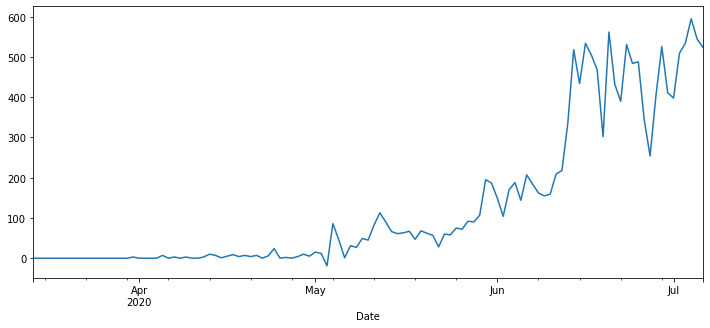

In [14]:
df[para].plot(figsize=(12,5));

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [16]:
adf_test(df[para])

Augmented Dickey-Fuller Test: 
ADF test statistic        2.310753
p-value                   0.998962
# lags used              13.000000
# observations          101.000000
critical value (1%)      -3.496818
critical value (5%)      -2.890611
critical value (10%)     -2.582277
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


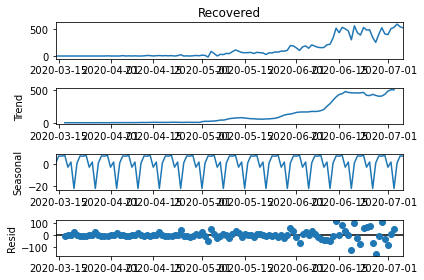

In [17]:
result = seasonal_decompose(df[para])
result.plot();

In [18]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df[para],k_diff=2)

In [19]:
adf_test(df['d1'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.207203
p-value                  0.000641
# lags used             13.000000
# observations          99.000000
critical value (1%)     -3.498198
critical value (5%)     -2.891208
critical value (10%)    -2.582596
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [20]:
# stepwise_fit = auto_arima(df[para], start_p=0, start_q=0,
#                           max_p=4, max_q=4,
#                           seasonal=False,
#                           d=None, trace=True,
#                           error_action='ignore',   # we don't want to know if an order does not work
#                           suppress_warnings=True,  # we don't want convergence warnings
#                           stepwise=True)           # set to stepwise

# stepwise_fit.summary()

stepwise_fit = auto_arima(df[para], start_p=0, start_q=0,
                          max_p=4, max_q=4,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True,           # set to stepwise
                         frequency=19)

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=1242.963, BIC=1248.435, Time=0.014 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=1237.319, BIC=1245.527, Time=0.043 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=1231.665, BIC=1239.874, Time=0.061 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=1241.744, BIC=1244.480, Time=0.007 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=1231.761, BIC=1242.706, Time=0.100 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=1230.975, BIC=1241.920, Time=0.139 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=1232.510, BIC=1246.191, Time=0.216 seconds
Fit ARIMA(0,1,3)x(0,0,0,0) [intercept=True]; AIC=1232.511, BIC=1246.191, Time=0.131 seconds
Fit ARIMA(1,1,3)x(0,0,0,0) [intercept=True]; AIC=1234.464, BIC=1250.881, Time=0.291 seconds
Total fit time: 1.006 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -611.488
Date:                Wed, 15 Jul 2020   AIC                           1230.975
Time:                        23:57:20   BIC                           1241.920
Sample:                             0   HQIC                          1235.417
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7555      2.639      1.802      0.072      -0.417       9.928
ma.L1         -0.3313      0.050     -6.641      0.000      -0.429      -0.234
ma.L2         -0.1699      0.053     -3.227      0.001      -0.273      -0.067
sigma2      2664.9821    194.150     13.726      0.000    2284.454    3045.510
===================================================================================
Ljung-Box (Q):                       26.21   Jarque-Bera (JB):               166.77
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              86.68   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
train = df.iloc[:104]
test = df.iloc[104:111]

In [22]:
# from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
# model = ARIMA(train[para],order=(0, 1, 2))
model = SARIMAX(train[para],order=(0, 1, 2),seasonal_order=(0,1,2,19))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Recovered   No. Observations:                  104
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 19)   Log Likelihood                -453.187
Date:                            Wed, 15 Jul 2020   AIC                            916.374
Time:                                    23:57:21   BIC                            928.529
Sample:                                03-14-2020   HQIC                           921.260
                                     - 06-25-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3767      0.058     -6.486      0.000      -0.491      -0.263
ma.L2         -0.1309      0.083     -1.586      0.113      -0.293       0.031
ma.S.L19      -0.2788      0.265     -1.054      0.292      -0.797       0.240
ma.S.L38      -0.0607      0.346     -0.175      0.861      -0.740       0.618
sigma2      2771.1972    237.647     11.661      0.000    2305.417    3236.977
===================================================================================
Ljung-Box (Q):                       29.15   Jarque-Bera (JB):               207.84
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):             301.93   Skew:                             1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# Obtain predicted values
# start=len(train)
# end=len(train)+len(test)-1

start=104
end=110

# predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(2,2,1) Predictions')
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(0,1,2,19) Predictions')

# df['forecast'] = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(2,2,1) Predictions')

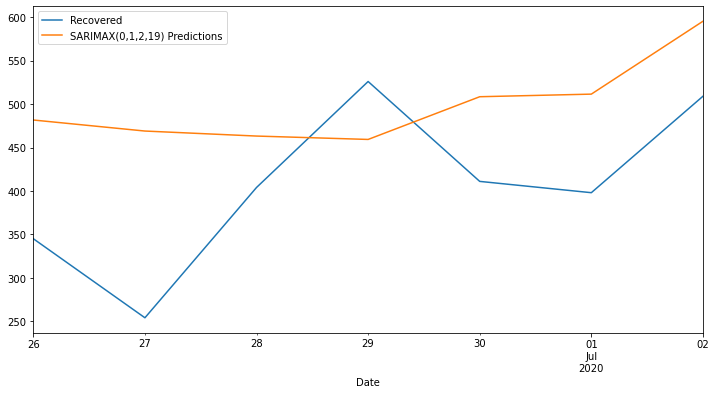

In [25]:
# Obtain predicted values
ax = test[para].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
# df['forecast'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [26]:
# # from statsmodels.tools.eval_measures import rmse
# from statsmodels.tools.eval_measures import mse

# error = mse(test[para], predictions)
# # print(f'ARIMA(2,2,1) RMSE Error: {error:11.10}')
# # print(f'ARIMA(2,2,1) MSE Error: {error:11.10}')
# print(f'SARIMAX(2,2,1,3) MSE Error: {error:11.10}')

In [27]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test[para], predictions)
MAE

110.68508056883876

In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# per_MAPE = (MAPE/sum(test[para]))*100
per_MAPE = mean_absolute_percentage_error(test[para], predictions)
print(per_MAPE,'%')

31.537608725693982 %


In [29]:
type(predictions)

pandas.core.series.Series

In [30]:
df['forecast'] = predictions
df

,Confirmed,Recovered,Decreased,d1,forecast
Date,,,,,
2020-03-14,0,0,0,NaN,NaN
2020-03-15,0,0,0,NaN,NaN
2020-03-16,0,0,0,0.0,NaN
2020-03-17,1,0,0,0.0,NaN
2020-03-18,0,0,0,0.0,NaN
...,...,...,...,...,...
2020-07-02,649,509,16,124.0,595.34069
2020-07-03,669,534,18,-86.0,NaN
2020-07-04,743,595,19,36.0,NaN


In [31]:
dictt = {f'{para}':test[para],f'Predicted_{para}':predictions}
dictt

{'Recovered': Date
 2020-06-26    345
 2020-06-27    254
 2020-06-28    404
 2020-06-29    526
 2020-06-30    411
 2020-07-01    398
 2020-07-02    509
 Freq: D, Name: Recovered, dtype: int64,
 'Predicted_Recovered': 2020-06-26    481.663466
 2020-06-27    468.964824
 2020-06-28    463.192617
 2020-06-29    459.298794
 2020-06-30    508.470142
 2020-07-01    511.462619
 2020-07-02    595.340690
 Freq: D, Name: SARIMAX(0,1,2,19) Predictions, dtype: float64}

In [32]:
predicted_df = pd.DataFrame(dictt)
predicted_df

,Recovered,Predicted_Recovered
Date,,
2020-06-26,345,481.663466
2020-06-27,254,468.964824
2020-06-28,404,463.192617
2020-06-29,526,459.298794
2020-06-30,411,508.470142
2020-07-01,398,511.462619
2020-07-02,509,595.340690


In [33]:
# predicted_df.to_csv('Predicted_WB.csv')
predicted_csv = pd.read_csv('Predicted_WB.csv')

predicted_csv.Date = pd.to_datetime(predicted_csv.Date)
predicted_csv.set_index('Date', inplace=True)
predicted_csv.index.freq = 'D'
# print(predicted_csv)
# predicted_csv = pd.concat([predicted_csv,predicted_df],axis=1,ignore_index=True)
predicted_csv = pd.merge(predicted_csv, predicted_df, left_index=True, right_index=True, how='outer')
# predicted_csv = predicted_csv.join(predicted_df, how='outer')
print(predicted_csv)
predicted_csv.to_csv('Predicted_WB.csv')

            Confirmed  Predicted_Confirmed  Recovered  Predicted_Recovered
Date                                                                      
2020-06-26        542           494.077396        345           481.663466
2020-06-27        521           585.479176        254           468.964824
2020-06-28        572           508.494449        404           463.192617
2020-06-29        624           492.160432        526           459.298794
2020-06-30        652           538.953772        411           508.470142
2020-07-01        611           509.517011        398           511.462619
2020-07-02        649           603.956236        509           595.340690


In [34]:
from pandas.tseries.offsets import DateOffset
import datetime
future_dates=[datetime.datetime(2020, 7, 7)+ DateOffset(n=x)for x in range(0,25)]

In [35]:
future_datest_df=pd.DataFrame(index=future_dates,columns=df.columns)

In [36]:
future_datest_df.tail()

,Confirmed,Recovered,Decreased,d1,forecast
2020-07-27,NaN,NaN,NaN,NaN,NaN
2020-07-28,NaN,NaN,NaN,NaN,NaN
2020-07-29,NaN,NaN,NaN,NaN,NaN
2020-07-30,NaN,NaN,NaN,NaN,NaN
2020-07-31,NaN,NaN,NaN,NaN,NaN


In [37]:
future_df=pd.concat([df,future_datest_df])
future_df = future_df.drop("d1", axis=1)
future_df

,Confirmed,Recovered,Decreased,forecast
2020-03-14,0,0,0,NaN
2020-03-15,0,0,0,NaN
2020-03-16,0,0,0,NaN
2020-03-17,1,0,0,NaN
2020-03-18,0,0,0,NaN
...,...,...,...,...
2020-07-27,NaN,NaN,NaN,NaN
2020-07-28,NaN,NaN,NaN,NaN
2020-07-29,NaN,NaN,NaN,NaN
2020-07-30,NaN,NaN,NaN,NaN


In [38]:
future_df[[para, 'forecast']]

,Recovered,forecast
2020-03-14,0,NaN
2020-03-15,0,NaN
2020-03-16,0,NaN
2020-03-17,0,NaN
2020-03-18,0,NaN
...,...,...
2020-07-27,NaN,NaN
2020-07-28,NaN,NaN
2020-07-29,NaN,NaN
2020-07-30,NaN,NaN


In [39]:
# future_df['forecast'] = results.predict(start = 115, end = 139, dynamic= True)
future_pred = results.predict(start=115, end=139, dynamic=False, typ='levels')

In [40]:
future_df['forecast'] = future_pred

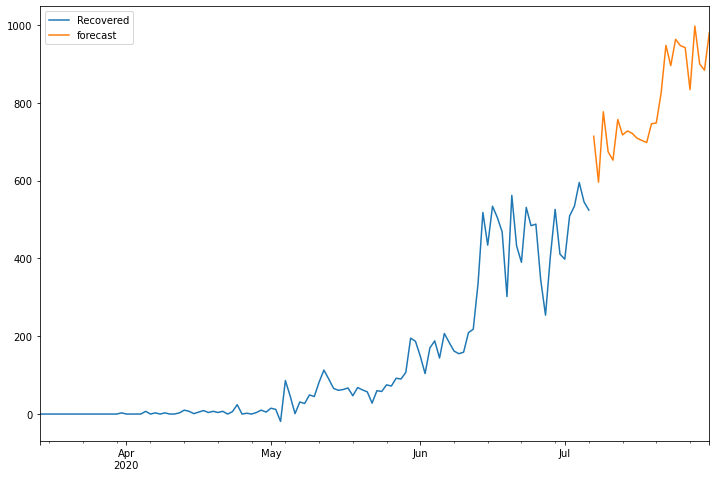

In [41]:
future_df[[para, 'forecast']].plot(figsize=(12, 8))

In [42]:
dicttt = {f'Future_Predicted_{para}':future_pred}
dicttt

{'Future_Predicted_Recovered': 2020-07-07    713.927595
 2020-07-08    595.852341
 2020-07-09    776.791823
 2020-07-10    673.851855
 2020-07-11    652.525889
 2020-07-12    756.801374
 2020-07-13    717.227866
 2020-07-14    727.450418
 2020-07-15    721.233565
 2020-07-16    708.850073
 2020-07-17    703.294211
 2020-07-18    697.603655
 2020-07-19    746.020976
 2020-07-20    748.055285
 2020-07-21    825.154358
 2020-07-22    947.434574
 2020-07-23    895.441558
 2020-07-24    962.999176
 2020-07-25    946.740523
 2020-07-26    941.644171
 2020-07-27    833.584883
 2020-07-28    996.996917
 2020-07-29    899.633288
 2020-07-30    883.717306
 2020-07-31    980.227273
 Freq: D, dtype: float64}

In [43]:
future_predicted_df = pd.DataFrame(dicttt)
future_predicted_df

,Future_Predicted_Recovered
2020-07-07,713.927595
2020-07-08,595.852341
2020-07-09,776.791823
2020-07-10,673.851855
2020-07-11,652.525889
2020-07-12,756.801374
2020-07-13,717.227866
2020-07-14,727.450418
2020-07-15,721.233565
2020-07-16,708.850073


In [44]:
# future_predicted_df.index.names = ['Date']
# future_predicted_df.index.freq = 'D'
# future_predicted_df.to_csv('Future_Predicted_WB.csv')

future_predicted_csv = pd.read_csv('Future_Predicted_WB.csv')

future_predicted_csv.Date = pd.to_datetime(future_predicted_csv.Date)
future_predicted_csv.set_index('Date', inplace=True)
future_predicted_csv.index.freq = 'D'
# print(future_predicted_csv)
# future_predicted_csv = pd.concat([future_predicted_csv,future_predicted_df],axis=1,ignore_index=True)
future_predicted_csv = pd.merge(future_predicted_csv, future_predicted_df, left_index=True, right_index=True, how='outer')
# predicted_csv = predicted_csv.join(predicted_df, how='outer')
print(future_predicted_csv)
future_predicted_csv.to_csv('Future_Predicted_WB.csv')

            Future_Predicted_Confirmed  Future_Predicted_Recovered
Date                                                              
2020-07-07                  570.970527                  713.927595
2020-07-08                  537.144913                  595.852341
2020-07-09                  551.713719                  776.791823
2020-07-10                  550.737129                  673.851855
2020-07-11                  599.214309                  652.525889
2020-07-12                  689.027049                  756.801374
2020-07-13                  603.845634                  717.227866
2020-07-14                  568.088346                  727.450418
2020-07-15                  619.701840                  721.233565
2020-07-16                  575.800544                  708.850073
2020-07-17                  643.706566                  703.294211
2020-07-18                  615.281961                  697.603655
2020-07-19                  550.324288                  746.02